In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 52.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
import yfinance as yf

# **Population and Sample**

In [ ]:
# Population and Sample
data = pd.DataFrame()
data['Population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]

In [ ]:
a_sample_without_replacement = data['Population'].sample(5, replace=False)
a_sample_without_replacement

3    20
9    60
7    16
4    19
6    72
Name: Population, dtype: int64

In [ ]:
a_sample_with_replacement = data['Population'].sample(5, replace=True)
a_sample_with_replacement

5    13
1    48
5    13
2    85
4    19
Name: Population, dtype: int64

In [ ]:
# Parameters of Population
print('Population mean is ', data['Population'].mean())
print('Population variance is ', data['Population'].var(ddof=0))
print('Population standard deviation is ', data['Population'].std(ddof=0))
print('Population size is ', data['Population'].shape[0])

Population mean is  43.0
Population variance is  571.8
Population standard deviation is  23.912339910598458
Population size is  10


In [ ]:
a_sample = data['Population'].sample(10, replace=True)
a_sample

4    19
8    50
3    20
1    48
8    50
1    48
6    72
6    72
8    50
6    72
Name: Population, dtype: int64

In [ ]:
# sample statistics
print('Sample mean is ', a_sample.mean())
print('Sample variance is ', a_sample.var(ddof=1))
print('Sample standard deviation is ', a_sample.std(ddof=1))
print('Sample size is ', a_sample.shape[0])

Sample mean is  50.1
Sample variance is  368.98888888888894
Sample standard deviation is  19.209083499451214
Sample size is  10


In [ ]:
# example of sample
sample_length = 500
sample_variance_collection0 = [data['Population'].sample(50, replace=True).var(ddof=0) for i in range(sample_length)]
sample_variance_collection1 = [data['Population'].sample(50, replace=True).var(ddof=1) for i in range(sample_length)]

In [ ]:
print('Population variance is ', data['Population'].var(ddof=0))
print('Average of sample variance with n is ', pd.DataFrame(sample_variance_collection0)[0].mean())
print('Average of sample variance with n-1 is ', pd.DataFrame(sample_variance_collection1)[0].mean())

Population variance is  571.8
Average of sample variance with n is  554.5910160000002
Average of sample variance with n-1 is  572.7317926530613


# **Variation of Sample**

In [ ]:
# Sampling from normal distribution
Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('Sample mean is ', Fstsample[0].mean())
print('Sample standard deviation is ', Fstsample[0].std(ddof=1))

Sample mean is  9.151518103073842
Sample standard deviation is  6.180558896374806


In [ ]:
# Empirical distribution of sample mean and variance
meanlist = []
varlist = []
for i in range(1000):
    sample = pd.DataFrame(np.random.normal(10,5,size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

In [ ]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist
collection['varlist'] = varlist

<AxesSubplot:>

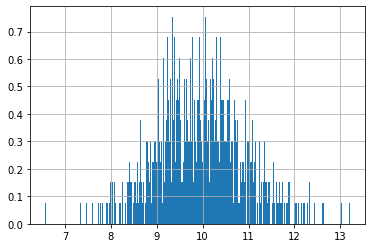

In [ ]:
collection['meanlist'].hist(bins=500, density=True, stacked=True)

<AxesSubplot:>

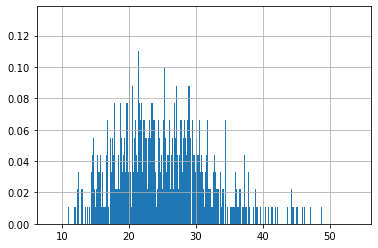

In [ ]:
collection['varlist'].hist(bins=500, density=True, stacked=True)

<AxesSubplot:>

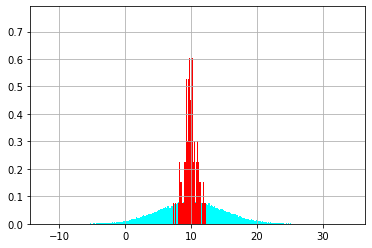

In [ ]:
# Demo in python - Populatio vs Empirical
pop=pd.DataFrame(np.random.normal(10,5,size=100000)) # approximate to population

pop[0].hist(bins=500,color='cyan',density=True,stacked=True)
collection['meanlist'].hist(bins=500,density=True,stacked=True,color='red')

In [ ]:
# Sampling from general distribution
samplemeanlist = []
apop = pd.DataFrame([1,0,1,0,1])
for t in range(100000):
    sample = apop[0].sample(10, replace=True) # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist

<AxesSubplot:>

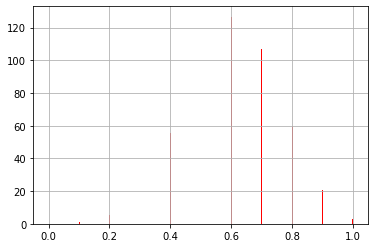

In [ ]:
acollec['meanlist'].hist(bins=500, color='red', density=True)

In [ ]:
samplemeanlist = []
for t in range(100000):
    sample = apop[0].sample(2000, replace=True) # large sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist

<AxesSubplot:>

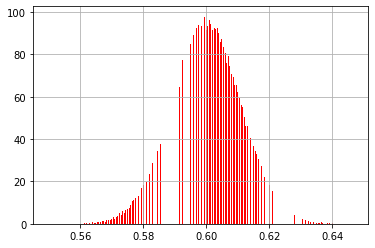

In [ ]:
acollec['meanlist'].hist(bins=500, color='red', density=True, stacked=True)

# **Confidence Interval**

In [ ]:
#Sample log return of Apple
aapl = pd.DataFrame(yf.download('AAPL', start='2007-01-01', end='2023-01-01'))
aapl['logReturn'] = np.log(aapl['Close'].shift(-1)) - np.log(aapl['Close'])

# values for calculating the 80% confidence interval
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = aapl['logReturn'].mean()
sample_std = aapl['logReturn'].std(ddof=1)/(aapl.shape[0])**0.5

[*********************100%***********************]  1 of 1 completed


In [ ]:
interval_left = sample_mean + z_left*sample_std
interval_right = sample_mean + z_right*sample_std
print("Sample Mean is ", sample_mean)
print("*******************************************************")
print("80% confidence interval is ")
print(interval_left, interval_right)

Sample Mean is  0.0009363713297335611
*******************************************************
80% confidence interval is 
0.000524028607058086 0.001348714052409036


# **Hypothesis Testing**

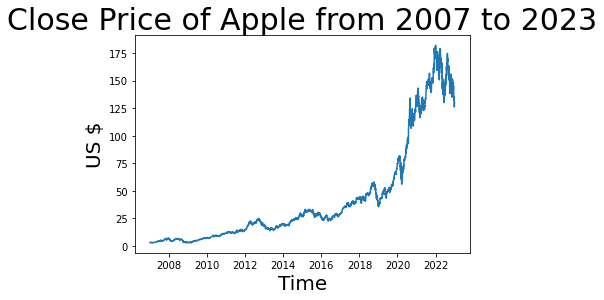

In [ ]:
plt.title("Close Price of Apple from 2007 to 2023", size=30)
plt.xlabel('Time',size=20)
plt.ylabel('US $', size=20)
plt.plot(aapl.loc[:,'Close'])

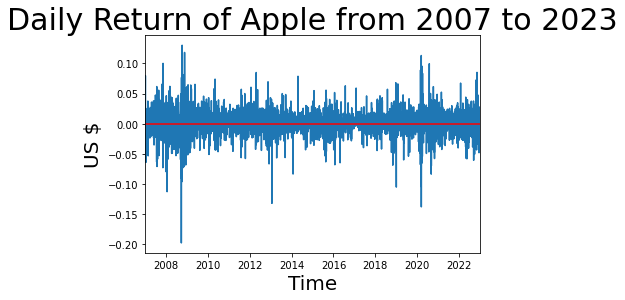

In [ ]:
plt.title("Daily Return of Apple from 2007 to 2023", size=30)
plt.xlabel('Time',size=20)
plt.ylabel('US $', size=20)
plt.xlim(aapl.index[0], aapl.index[-1])
plt.plot(aapl.loc[:,'logReturn'])
plt.axhline(0, color='red')

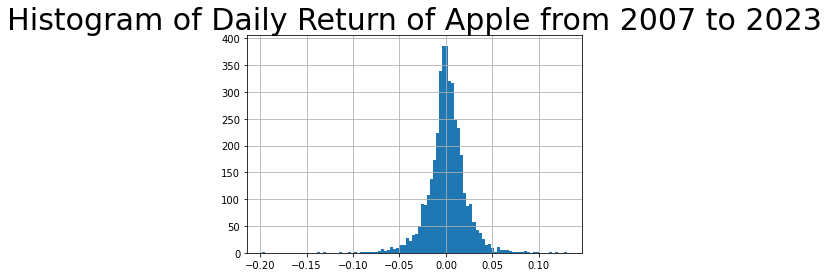

In [ ]:
plt.title("Histogram of Daily Return of Apple from 2007 to 2023", size=30)
aapl.loc[:, 'logReturn'].dropna().hist(bins=100)

#### Setting hypthesis:
Null H0: z-hat = 0<br>
Alt H1: z-hat /= 0

In [ ]:
# Standardization
xbar = aapl['logReturn'].mean()
s = aapl['logReturn'].std(ddof=1)
n = aapl['logReturn'].shape[0]
zhat = (xbar-0)/(s/(n**0.5))
print(zhat)

2.9102202550463425


In [ ]:
# Set Decision Criteria
alpha = 0.05
zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft
print(zleft, zright)
print('At the significance level of', alpha)
print('Shall we reject?:', zhat>zright or zhat<zleft)

-1.9599639845400545 1.9599639845400545
At the significance level of 0.05
Shall we reject?: True


#### Hypothesis for One Tail Test
Null H0: z-hat <= 0<br>
Alt H1: z-hat > 0

In [ ]:
# Set Decision Criteria
alpha = 0.05
zright = norm.ppf(1-alpha, 0, 1)
print(zright)
print('At the significance level of', alpha)
print('Shall we reject?:', zhat>zright)

1.6448536269514722
At the significance level of 0.05
Shall we reject?: True


#### p-value of Two Tailed Test
Reject H0 if p-value < a

In [ ]:
# Calculate p-value for Two Tailed Test in Python
alpha = 0.05
p = 2*(1 - (norm.cdf(abs(zhat), 0, 1)))
print('p-value is',p)
print('At the significance level of', alpha)
print('Shall we reject?:', p<alpha)

p-value is 0.0036117413048062375
At the significance level of 0.05
Shall we reject?: True
